# Classification Error Metrics

There are several metrics discussed in the lecture like Confusion Matrix, Accuracy, Precision, Recall, Specificity, and range of curves like ROC, AUC and Precision-Recall Curves. Scikit Learn has the metrics library that includes all these metrics.

1.png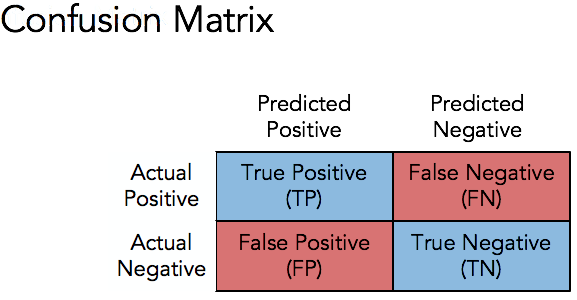

This tutorial will look at the error metrics that has been discussed in the lecture for a dummy classification problem using the logistic regression algorithm. 

Find more detailed information on the metrics available through Scikit-Learn at the link below.
#### Source:  [sklearn.metrics ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) 

Import the libraries required to complete the task.


4.png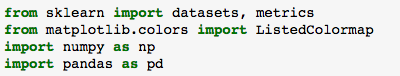

In [1]:
from sklearn import datasets, metrics
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

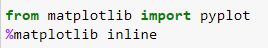

In [2]:
from matplotlib import pyplot
%matplotlib inline

Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data. For more information check the help for the make_classification call as shown below. 

6.png

In [3]:
datasets.make_classification?

Signature:
datasets.make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from 



7.png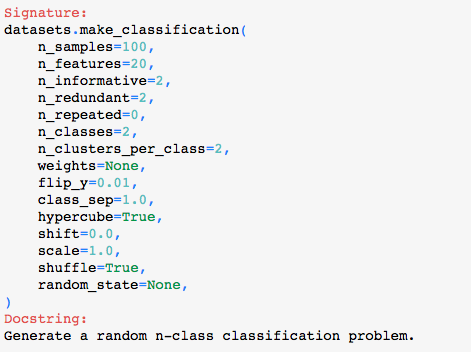

Use the make_classification call to generate a random n-class classification problem. Here two classes with two features are demonstrated. 

8.png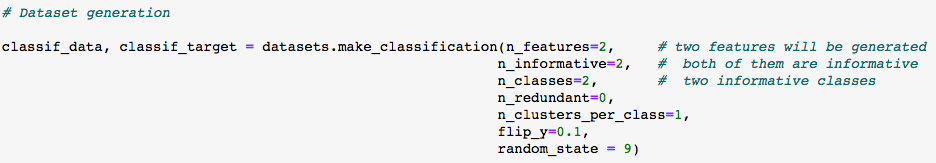

In [5]:
classif_data, classif_target = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=9)

Look at the data generated to confirm the features and number of samples itself.

9.png

In [6]:
classif_data.shape

(100, 2)

(100, 2)

Look at some rows. 

10.png


In [7]:
classif_data[:6, :]

array([[ 1.28542309,  1.29278311],
       [-0.0739366 , -0.36733303],
       [ 0.88953436,  0.76654703],
       [ 1.74988664,  1.8437565 ],
       [ 0.8886347 ,  0.63858731],
       [ 1.67422524, -0.87330412]])

array([[ 1.28542309,  1.29278311],
       [-0.0739366 , -0.36733303],
       [ 0.88953436,  0.76654703],
       [ 1.74988664,  1.8437565 ],
       [ 0.8886347 ,  0.63858731],
       [ 1.67422524, -0.87330412]])

Check the target data and see if it matches the size of the features generated. 

11.png

In [8]:
classif_target.shape

(100,)

(100,)

Print the target values: It should be the binary classes...

12.png

In [9]:
classif_target

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

13.png 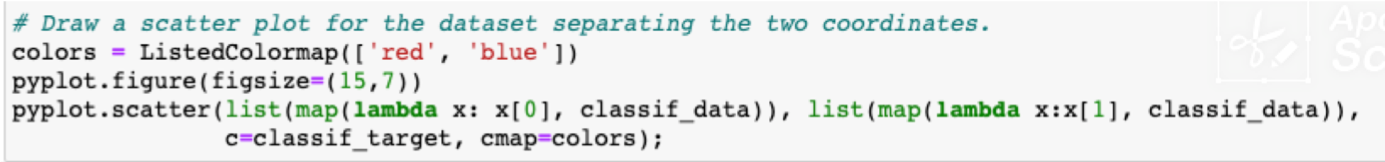

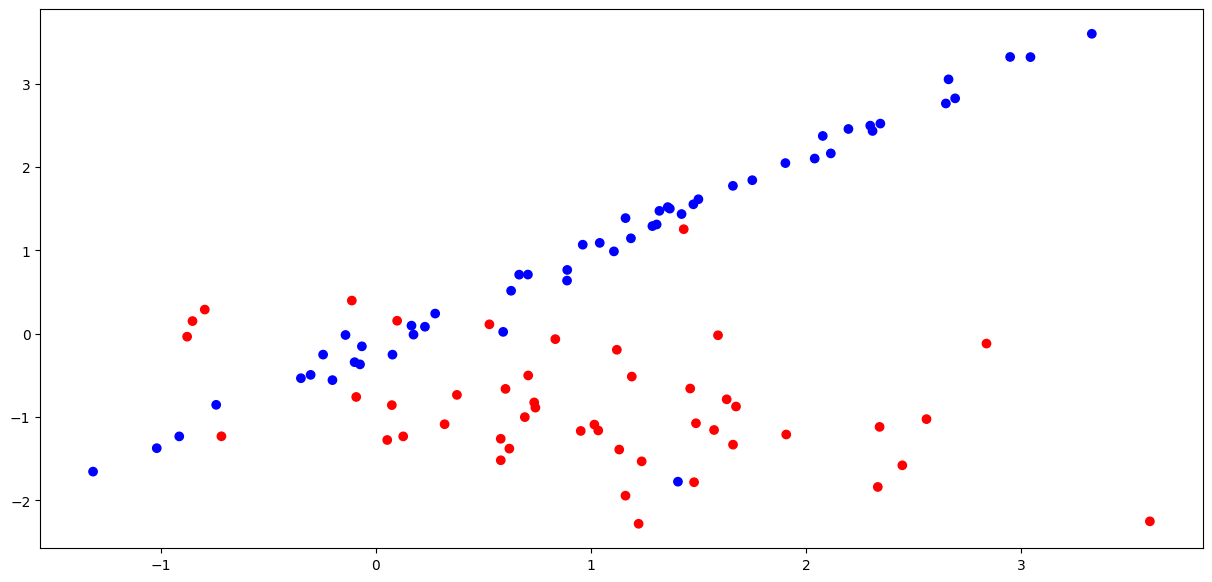

In [10]:
colors = ListedColormap(['red', 'blue'])
pyplot.figure(figsize=(15, 7))
pyplot.scatter(list(map(lambda x: x[0], classif_data)), list(map(lambda x:x[1], classif_data)), c=classif_target, cmap=colors)

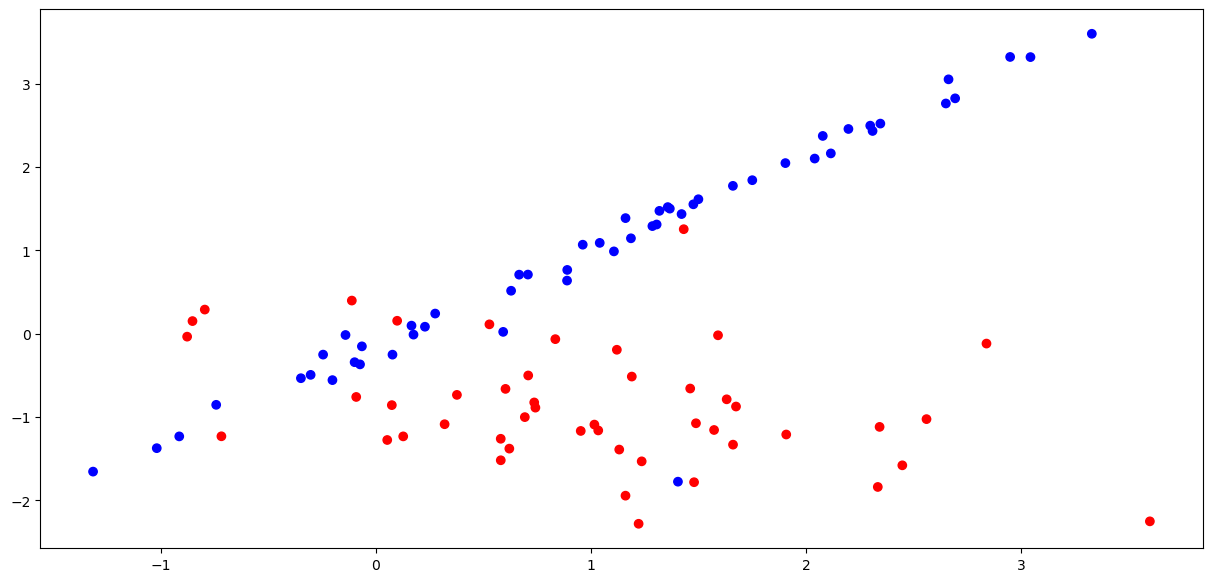

14.png

In [11]:
from sklearn.model_selection import train_test_split

15.png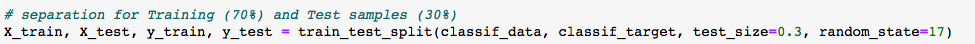

In [12]:
X_train, X_test, y_train, y_test = train_test_split(classif_data, classif_target, test_size=0.3, random_state=17)

16.png

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


(70, 2) (30, 2) (70,) (30,)


### Feed a logistic regression model 

17.png

In [14]:
from sklearn.linear_model import LogisticRegression

18.png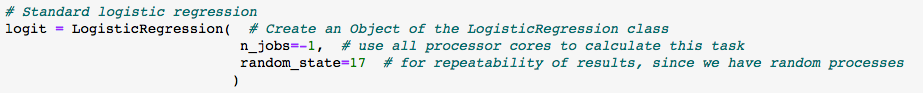

In [15]:
logit = LogisticRegression(n_jobs=-1, random_state=17)

19.png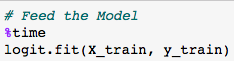

In [16]:
%time
logit.fit(X_train, y_train)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs


LogisticRegression(n_jobs=-1, random_state=17)

CPU times: total: 0 ns
Wall time: 0 ns


LogisticRegression(n_jobs=-1, random_state=17)

CPU times: total: 0 ns
Wall time: 0 ns


LogisticRegression(n_jobs=-1, random_state=17)

20.png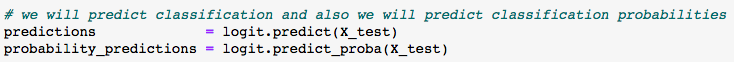

In [17]:
predictions = logit.predict(X_test)
probability_predictions = logit.predict_proba(X_test)

21.png

In [18]:
probability_predictions[:6, :]

array([[7.68388307e-01, 2.31611693e-01],
       [9.99495025e-01, 5.04974901e-04],
       [2.58574901e-01, 7.41425099e-01],
       [2.27983253e-01, 7.72016747e-01],
       [6.95368575e-02, 9.30463142e-01],
       [9.36320630e-02, 9.06367937e-01]])

array([[7.68392235e-01, 2.31607765e-01],
       [9.99494428e-01, 5.05572103e-04],
       [2.58581094e-01, 7.41418906e-01],
       [2.27973181e-01, 7.72026819e-01],
       [6.95357044e-02, 9.30464296e-01],
       [9.36538104e-02, 9.06346190e-01]])

22.png

In [19]:
probability_predictions.shape

(30, 2)

(30, 2)

23.png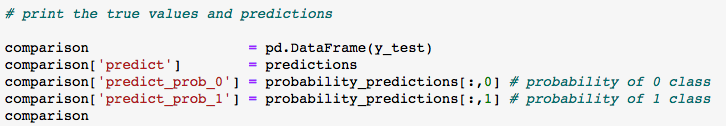

In [20]:
comparison = pd.DataFrame(y_test)
comparison['predict'] = predictions
comparison['predict_proba_0'] = probability_predictions[:,0]
comparison['predict_proba_1'] = probability_predictions[:,1]
comparison

,0,predict,predict_proba_0,predict_proba_1
0,1,0,0.768388,0.231612
1,0,0,0.999495,0.000505
2,0,1,0.258575,0.741425
3,1,1,0.227983,0.772017
4,1,1,0.069537,0.930463
5,0,1,0.093632,0.906368
6,1,1,0.474942,0.525058
7,1,0,0.678601,0.321399
8,0,0,0.995550,0.004450
9,0,0,0.929062,0.070938


,0,predict,predict_prob_0,predict_prob_1
0,1,0,0.768392,0.231608
1,0,0,0.999494,0.000506
2,0,1,0.258581,0.741419
3,1,1,0.227973,0.772027
4,1,1,0.069536,0.930464
5,0,1,0.093654,0.906346
6,1,1,0.474944,0.525056
7,1,0,0.678603,0.321397
8,0,0,0.995546,0.004454
9,0,0,0.929036,0.070964


24.png

In [21]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                30 non-null     int64  
 1   predict          30 non-null     int64  
 2   predict_proba_0  30 non-null     float64
 3   predict_proba_1  30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               30 non-null     int32  
 1   predict         30 non-null     int32  
 2   predict_prob_0  30 non-null     float64
 3   predict_prob_1  30 non-null     float64
dtypes: float64(2), int32(2)
memory usage: 852.0 bytes


## Metrics

#### Accuracy
$$ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

25.png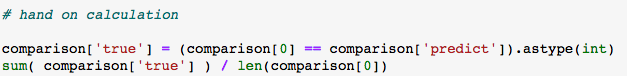

In [22]:
comparison['true'] = (comparison[0] == comparison['predict']).astype(int)
sum(comparison['true']) / len(comparison[0])

0.7666666666666667

0.7666666666666667

26.png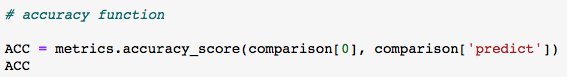

In [23]:
ACC = metrics.accuracy_score(comparison[0], comparison['predict'])
ACC

0.7666666666666667

0.7666666666666667

### Confusion matrix

27.png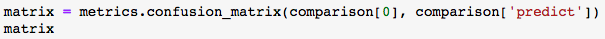

In [24]:
matrix = metrics.confusion_matrix(comparison[0], comparison['predict'])
matrix

array([[13,  3],
       [ 4, 10]])

array([[13,  3],
       [ 4, 10]], dtype=int64)

#### Precision
$$prec = PPV = \frac{TP}{TP + FP}$$

28.png

29.png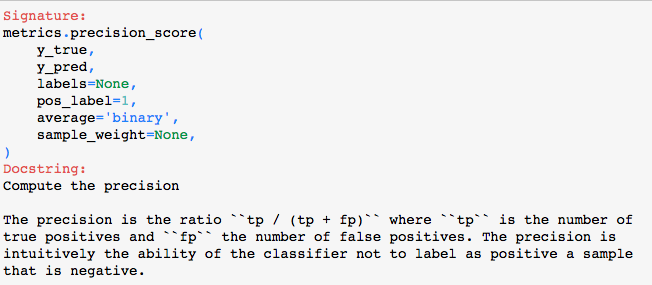

In [25]:
# since we solve the binary classification task, we can separately evaluate the Precision of 
# assigning objects to the 0-class and to the 1-class

30.png

In [25]:
metrics.precision_score(comparison[0], comparison['predict'], pos_label=0)

np.float64(0.7647058823529411)

0.7647058823529411

31.png

In [26]:
metrics.precision_score(comparison[0], comparison['predict'])

np.float64(0.7692307692307693)

0.7692307692307693

#### Recall
$$rec = TPR = \frac{TP}{TP + FN}$$

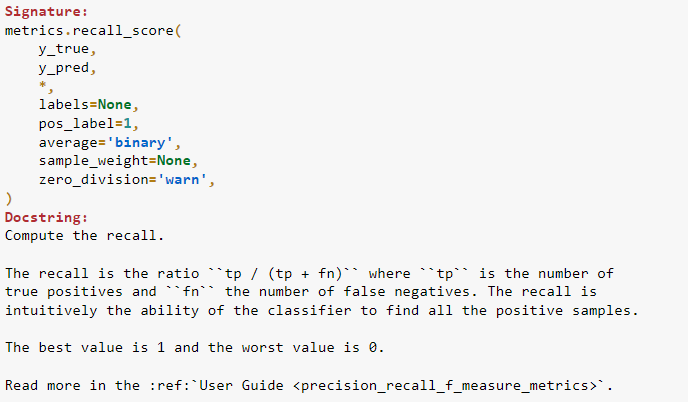

32.png

In [27]:
metrics.recall_score(comparison[0], comparison['predict'], pos_label=0)

np.float64(0.8125)

0.8125

33.png

In [28]:
metrics.recall_score(comparison[0], comparison['predict'])

np.float64(0.7142857142857143)

0.7142857142857143

#### F1
$$F1 = 2\frac{PPV\cdot TPR}{PPV + TPR}.$$

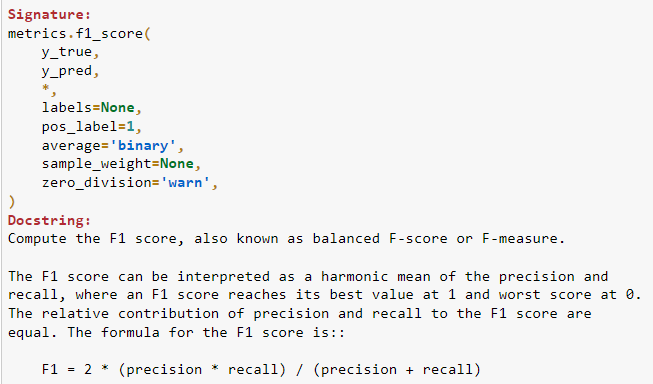

34.png

In [29]:
metrics.f1_score(comparison[0], comparison['predict'], pos_label=0)

np.float64(0.7878787878787878)

0.787878787878788

35.png

In [30]:
metrics.f1_score(comparison[0], comparison['predict'])

np.float64(0.7407407407407407)

0.7407407407407408

#### classification report

36.png

In [31]:
print(metrics.classification_report(comparison[0], comparison['predict']))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.77      0.71      0.74        14

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.77      0.71      0.74        14

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



##### Macro averaging  (macro avg)
reduces your multiclass predictions down to multiple sets of binary predictions, calculates the corresponding metric for each of the binary cases, and then averages the results together

### ROC curve

37.png

38.png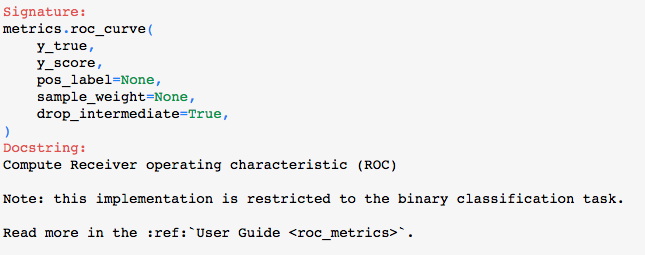

$$rec = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP},\quad  FPR = 1 - SPC,$$


$TPR$ (True positive rate, recall, sensitivity) - the proportion of correctly classified positive examples among all positive examples.

$FPR$ (False positive rate) - proportion of erroneously classified negative examples among all negative examples.


39.png

In [32]:
FPR, TPR, _ = metrics.roc_curve(comparison[0], comparison['predict_proba_1'])

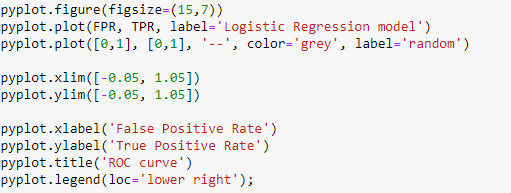

TypeError: 'module' object is not callable

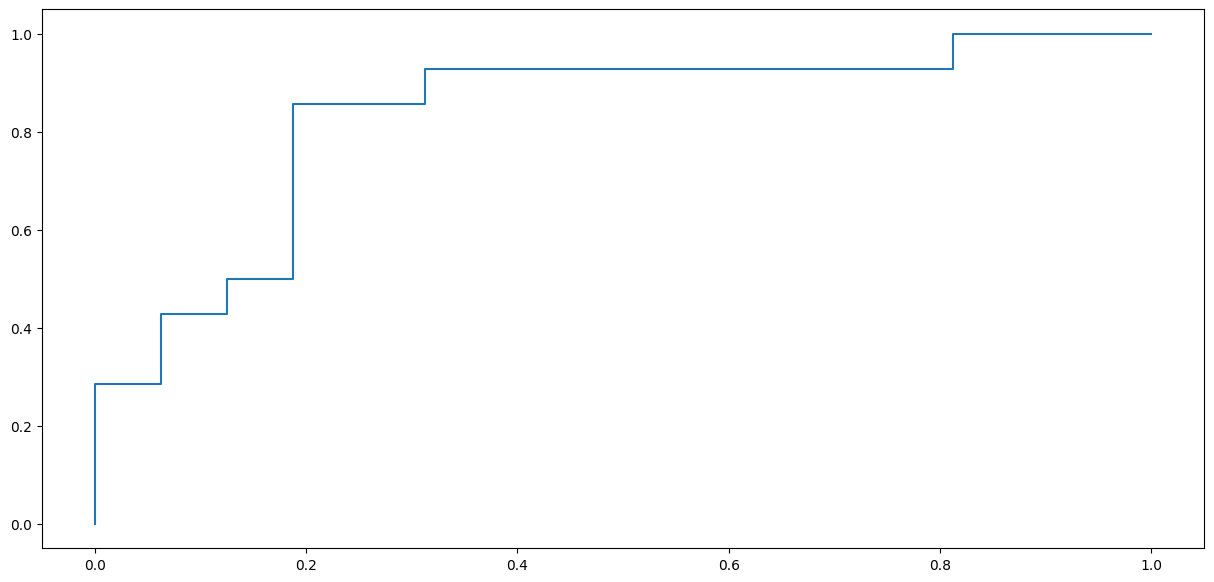

In [34]:
pyplot.figure(figsize=(15, 7))
pyplot.plot(FPR, TPR, label='Logistic Regression model')
pyplot([0,1], [0,1], '--', color='grey', label='random')

pyplot.xlim([-0.05, 1.05])
pyplot.ylim([-0.0, 1.05])

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve')
pyplot.legend(loc='lower right')


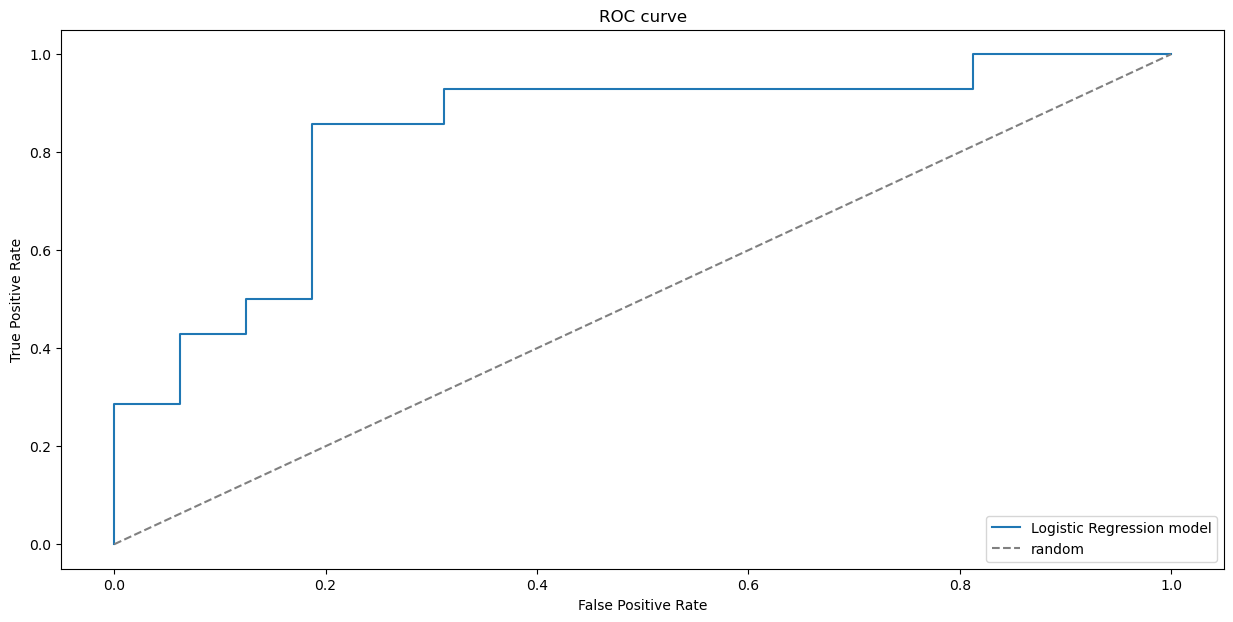

#### ROC AUC (Area Under Curve) 

41.png

In [35]:
metrics.roc_auc_score(comparison[0], comparison['predict_proba_1'])

np.float64(0.8348214285714286)

0.8348214285714286

#### Precision AUC

42.png

In [36]:
metrics.average_precision_score(comparison[0], comparison['predict_proba_1'])

np.float64(0.8243723208008922)

0.6827838827838828

#### Logistic loss

43.png

In [37]:
metrics.log_loss(comparison[0], comparison['predict_proba_1'])

0.5549586545097868

0.55493677289325